# GloVe

Make exports available:

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Imports

In [2]:
from similarities.similarities import GloVeSimilarity
from os import listdir
from statistics import mean, stdev
import matplotlib.pyplot as plt
import time

## Definitions

In [17]:
modelPath = "/Users/joaquingomez/Library/Mobile Documents/com~apple~CloudDocs/UPC/Ingeniería Informática (FIB)/4o/Q9/TFG/models/GloVe/GloVe.txt"
spacyPath ="../../models/GloVe/spacy.GloVe.model"
experimentsClass = GloVeSimilarity(modelPath, spacyPath)

pathDataExperiment1 = "../../data/experiment1-small_text-continuous/"
pathDataExperiment2 = "../../data/experiment2-big_text-continuous/docs/"

# DOCUMENTS EXPERIMENT 1

print("DOCUMENTS EXPERIMENT 1\n")

docsExp1 = []
orgExp1 = ""
for doc in listdir(pathDataExperiment1):
    if doc.endswith(".txt"):
        if doc[-7:] == "ORG.txt":
            orgExp1 = pathDataExperiment1 + doc
        else:
            docsExp1.append(pathDataExperiment1 + doc)
            
docsExp1.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp1) + "\n")
print("ORG: " + orgExp1)


# DOCUMENTS EXPERIMENT 2

print("\n DOCUMENTS EXPERIMENT 2\n")

docsExp2 = []
orgExp2 = ""
for doc in listdir(pathDataExperiment2):
    if doc.endswith(".txt"):
        if doc == "AE.txt":
            orgExp2 = pathDataExperiment2 + doc
        elif doc == "AI.txt":
            continue
        else:
            docsExp2.append(pathDataExperiment2 + doc)
            
docsExp2.sort(key = lambda x: int(x.split("_")[-1][:-4]))
            
print("DOCS: " + str(docsExp2) + "\n")
print("ORG: " + orgExp2)

/Users/joaquingomez/opt/anaconda3/envs/tfg/lib/python3.7/site-packages/spacy/_ml.py:304: UserWarning: [W019] Changing vectors name from en_model.vectors to en_model.vectors_59918, to avoid clash with previously loaded vectors. See Issue #3853.
  warnings.warn(Warnings.W019.format(old=old_name, new=new_name))


DOCUMENTS EXPERIMENT 1

DOCS: ['../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_000.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_010.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_20.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_30.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_040.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_50.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_060.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_070.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_080.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_090.txt', '../../data/experiment1-small_text-continuous/180-CDIF_579-UMA_100.txt']

ORG: ../../data/experiment1-small_text-continuous/ORG.txt

 DOCUMENTS EXPERIMENT 2

DOCS: ['../../data/experiment2-big_text-continuous/docs/AE_AI_0.txt', '../../data/ex

## Experiments

### Experiment I (Small texts) - Model validation (Soft-Cosine Similarity)

In [6]:
results11 = []
times11 = []

for doc in docsExp1:
    start_time = time.time()
    results11.append(experimentsClass.distance(orgExp1, doc, 0, -1))
    times11.append(time.time() - start_time)

results11 = [1 - x for x in results11]

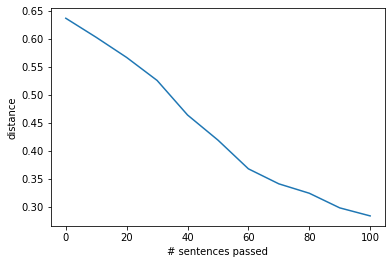

In [7]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results11)

plt.savefig('../../figures/GloVe_exp1_smallText_SoftCosine.png')

In [8]:
results11

[0.6367551230024708,
 0.6025906197761572,
 0.5666054284801892,
 0.5254986639173069,
 0.4637050656031896,
 0.4187371324677067,
 0.36739163729991475,
 0.34055488502020603,
 0.32374653118274666,
 0.2975848014275225,
 0.28318614143089127]

In [9]:
print("Mean execution time: " + str(mean(times11)))

Mean execution time: 6.8173675753853535


In [10]:
times11

[6.474427938461304,
 6.955677032470703,
 6.383724212646484,
 11.48569393157959,
 7.1008851528167725,
 6.342076301574707,
 6.319110870361328,
 5.359694004058838,
 7.2675230503082275,
 6.1009039878845215,
 5.201326847076416]

### Experiment I (Small texts) - Model validation (Normal Word Mover's Distance)

In [11]:
results12n = []
times12n = []

for doc in docsExp1:
    start_time = time.time()
    results12n.append(experimentsClass.distance(orgExp1, doc, 1, False))
    times12n.append(time.time() - start_time)

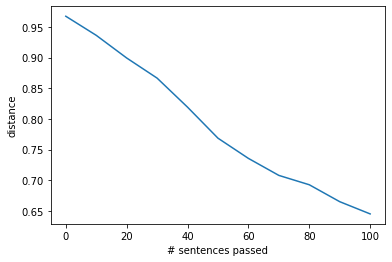

In [12]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12n)

plt.savefig('../../figures/GloVe_exp1_smallText_NormalWordMovers.png')

In [13]:
results12n

[0.9673973624934968,
 0.9362909134896127,
 0.8993402986193927,
 0.8665205816471326,
 0.8191626695801074,
 0.768586969383464,
 0.7356437929532319,
 0.7079238296827773,
 0.6926647441591184,
 0.6650741244101676,
 0.6451291978564945]

In [14]:
print("Mean execution time: " + str(mean(times12n)))

Mean execution time: 39.11941816590049


In [15]:
times12n

[35.38051199913025,
 37.023173332214355,
 42.13735222816467,
 46.2923641204834,
 35.210346937179565,
 38.01174187660217,
 40.43129587173462,
 39.429365158081055,
 42.01516604423523,
 37.63324499130249,
 36.74903726577759]

### Experiment I (Small texts) - Model validation (Relaxed Word Mover's Distance)

In [18]:
results12r = []
times12r = []

for doc in docsExp1:
    start_time = time.time()
    results12r.append(experimentsClass.distance(orgExp1, doc, 1, True))
    times12r.append(time.time() - start_time)

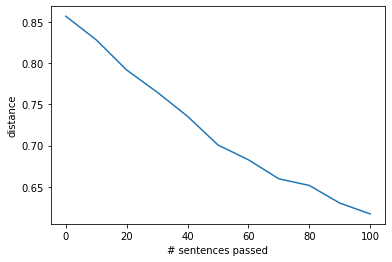

In [19]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 110, 10)), results12r)

plt.savefig('../../figures/GloVe_exp1_smallText_RelaxedWordMovers.png')

In [20]:
results12r

[0.8567169308662415,
 0.8281270265579224,
 0.7915219068527222,
 0.7647862434387207,
 0.7354444861412048,
 0.7006961107254028,
 0.6827519536018372,
 0.6597104072570801,
 0.6516868472099304,
 0.6302999258041382,
 0.6171602010726929]

In [21]:
print("Mean execution time: " + str(mean(times12r)))

Mean execution time: 0.43063540892167523


In [22]:
times12r

[0.5677900314331055,
 0.4642338752746582,
 0.44395971298217773,
 0.41583800315856934,
 0.34885191917419434,
 0.5688838958740234,
 0.4512300491333008,
 0.32939600944519043,
 0.4152219295501709,
 0.38114404678344727,
 0.35044002532958984]

### Experiment II (Big texts) - Model validation (Soft-Cosine Similarity)

In [23]:
results21 = []
times21 = []

for doc in docsExp2:
    start_time = time.time()
    results21.append(experimentsClass.distance(orgExp2, doc, 0, -1))
    times21.append(time.time() - start_time)
    
results21 = [1 - x for x in results21]

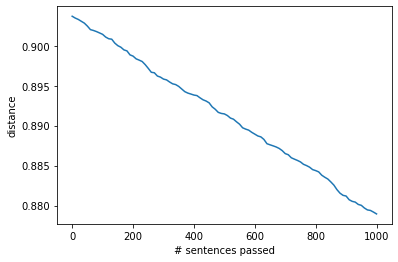

In [24]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results21)

plt.savefig('../../figures/GloVe_exp2_bigText_SoftCosine.png')

In [25]:
results21

[0.9036927437483133,
 0.903466258566103,
 0.9032958411938294,
 0.903061230855393,
 0.9028302685614379,
 0.9024582217468886,
 0.9020189242594204,
 0.9019114822193813,
 0.9017710035499685,
 0.901602136555822,
 0.9014282622768713,
 0.9010893673341797,
 0.9008778157452277,
 0.9008181762534715,
 0.9003326645982961,
 0.9000100976074153,
 0.8998160849150053,
 0.8994833868106898,
 0.8993560016609576,
 0.8988587065813037,
 0.8987041696944628,
 0.8983630604650943,
 0.8982021040876083,
 0.8980266812864992,
 0.8976351640367247,
 0.8971699299287225,
 0.896679287415876,
 0.8966175677328985,
 0.8962088504107626,
 0.8960733415230122,
 0.8958271742135684,
 0.8957288398067788,
 0.895465164386711,
 0.8952351993458822,
 0.8951394382771833,
 0.8949133655221501,
 0.8945847259875237,
 0.8942561358843284,
 0.8940741762351759,
 0.8939543987822477,
 0.8938282693528972,
 0.893760562174693,
 0.8934836596591214,
 0.8932340560913149,
 0.8930802940082542,
 0.8928529836783226,
 0.892351743075038,
 0.892051312740156,


In [26]:
print("Mean execution time: " + str(mean(times21)))

Mean execution time: 37.86924667641668


In [27]:
print("Stdev execution time: " + str(stdev(times21)))

Stdev execution time: 5.211972617593337


In [28]:
times21

[38.94755005836487,
 36.332687854766846,
 34.61925506591797,
 34.60858964920044,
 34.50112986564636,
 34.57743287086487,
 34.489503145217896,
 38.37768769264221,
 34.51710104942322,
 35.586700677871704,
 36.573225021362305,
 34.64031195640564,
 34.43039011955261,
 34.60434317588806,
 35.7110390663147,
 35.12767004966736,
 35.124961853027344,
 35.42870807647705,
 36.42180919647217,
 34.94984769821167,
 36.29629898071289,
 34.34925985336304,
 34.435373067855835,
 34.40354371070862,
 35.66098880767822,
 34.641335010528564,
 34.40366172790527,
 34.53838801383972,
 34.41094398498535,
 34.3525550365448,
 34.3470299243927,
 34.940643072128296,
 35.580270767211914,
 35.2366840839386,
 42.14904594421387,
 46.51213002204895,
 43.58610200881958,
 46.8739972114563,
 45.28969097137451,
 47.571890115737915,
 40.98457884788513,
 47.22322607040405,
 48.26144099235535,
 43.78618025779724,
 43.74021005630493,
 39.94449806213379,
 37.56609487533569,
 35.07696485519409,
 33.24099802970886,
 34.23413014411

### Experiment II (Big texts) - Model validation (Relaxed Word Mover's Distance)

In [29]:
results22 = []
times22 = []

for doc in docsExp2:
    start_time = time.time()
    results22.append(experimentsClass.distance(orgExp2, doc, 1, True))
    times22.append(time.time() - start_time)

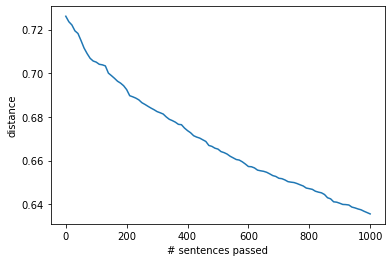

In [30]:
plt.xlabel('# sentences passed')
plt.ylabel('distance')

plt.plot(list(range(0, 1010, 10)), results22)

plt.savefig('../../figures/GloVeword2vec_exp2_bigText_WordMovers.png')

In [31]:
results22

[0.7260792851448059,
 0.723568856716156,
 0.7220966219902039,
 0.7194041609764099,
 0.7181893587112427,
 0.7149718403816223,
 0.7115370035171509,
 0.7090072631835938,
 0.7068222761154175,
 0.7055870890617371,
 0.705081582069397,
 0.7040944695472717,
 0.7038471698760986,
 0.703350841999054,
 0.7000517845153809,
 0.698894202709198,
 0.697675347328186,
 0.6963433623313904,
 0.6954740881919861,
 0.6942817568778992,
 0.6924992203712463,
 0.6897151470184326,
 0.6892156004905701,
 0.6886177062988281,
 0.6878129243850708,
 0.6865209937095642,
 0.6857360005378723,
 0.6848707795143127,
 0.6840440630912781,
 0.6833040118217468,
 0.6824451088905334,
 0.6819167137145996,
 0.68133145570755,
 0.6800116896629333,
 0.6789284944534302,
 0.6783252358436584,
 0.6776096820831299,
 0.6766166687011719,
 0.6764510273933411,
 0.6749101877212524,
 0.6737330555915833,
 0.6727691292762756,
 0.6714156866073608,
 0.6707776188850403,
 0.6703209280967712,
 0.6695439219474792,
 0.6687973737716675,
 0.6669617295265198,

In [32]:
print("Mean execution time: " + str(mean(times22)))

Mean execution time: 139.7398536653802


In [33]:
print("Stdev execution time: " + str(stdev(times22)))

Stdev execution time: 284.3561467363345


In [34]:
times22

[52.657264947891235,
 50.96852993965149,
 50.724786043167114,
 84.08006310462952,
 2193.9723341464996,
 77.97051405906677,
 74.16991686820984,
 90.99020576477051,
 104.57761192321777,
 96.75833082199097,
 101.09703874588013,
 113.26156616210938,
 100.35615491867065,
 83.41739797592163,
 77.74169492721558,
 73.47062993049622,
 77.54417181015015,
 71.59595704078674,
 74.94703793525696,
 106.19242000579834,
 113.60195302963257,
 90.27945303916931,
 93.34121918678284,
 94.00793600082397,
 95.46064305305481,
 96.97152090072632,
 92.38741707801819,
 86.24401116371155,
 103.30166101455688,
 94.28047370910645,
 93.22962403297424,
 99.55346202850342,
 109.22561693191528,
 95.8121829032898,
 103.65806317329407,
 101.03958010673523,
 101.24897193908691,
 116.71565413475037,
 114.58538007736206,
 116.18865585327148,
 116.81343221664429,
 107.66460800170898,
 109.74408602714539,
 2058.8934438228607,
 73.61284685134888,
 76.71421694755554,
 85.73403596878052,
 106.98827505111694,
 119.44789004325867